In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [74]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import Sequential



In [5]:
data=pd.read_csv('../input/digit-recognizer/train.csv')

In [34]:
data.head(20)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
x=data.iloc[:,1:] / 255
y=data.iloc[:,0]

In [97]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=0)

In [109]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
])

In [110]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

In [111]:
model.fit(train_x,train_y,epochs=20,)

Epoch 1/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3453 - accuracy: 0.9033
Epoch 2/20
1050/1050 [==============================] - 3s 2ms/step - loss: 0.1554 - accuracy: 0.9552
Epoch 3/20
1050/1050 [==============================] - 3s 2ms/step - loss: 0.1109 - accuracy: 0.9671
Epoch 4/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0836 - accuracy: 0.9754
Epoch 5/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0654 - accuracy: 0.9798
Epoch 6/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0522 - accuracy: 0.9844
Epoch 7/20
1050/1050 [==============================] - 3s 2ms/step - loss: 0.0411 - accuracy: 0.9876
Epoch 8/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0333 - accuracy: 0.9905
Epoch 9/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0262 - accuracy: 0.9924
Epoch 10/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.022

In [113]:
test_loss,test_acc=model.evaluate(test_x,test_y)

263/263 [==============================] - 0s 2ms/step - loss: 0.1218 - accuracy: 0.9708


In [114]:
prediction=model.predict(test_x)

In [121]:
np.argmax(prediction[1])

6

In [122]:
np.array(test_y)[1]

6

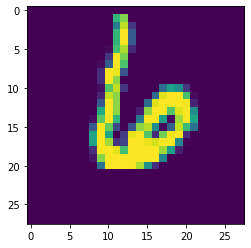

In [123]:
plt.figure()
plt.imshow(np.reshape(np.array(test_x)[1],(28,28)))